In [1]:
import numpy as np
import pandas as pd
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [158]:
survey_data_youtube = pd.read_csv("../data/evaluation/Major project evaluation form (YouTube data).csv")
survey_data_bing = pd.read_csv("../data/evaluation/Major project evaluation form (Bing data).csv")
survey_data_flickr = pd.read_csv("../data/evaluation/Major project evaluation form (Flickr data).csv")


In [240]:
## to remove the empty space and \n character before and after the text
for i in range(7,12):
    survey_data_flickr.iloc[:, i] = survey_data_flickr.iloc[:, i].apply(lambda x: x.strip())

In [241]:
dataframes = [survey_data_youtube, survey_data_bing, survey_data_flickr]
survey_data = pd.concat(dataframes)

In [244]:
df = survey_data.copy()

In [245]:
ratings_transformed_image = df.iloc[:, 2:7] 
ratings = []
ratings.append([list(ratings_transformed_image.iloc[:,i]) for i in range(5)])
ratings = ratings[0]
ratings_list = list(itertools.chain.from_iterable(ratings))


### Survey analysis 1 - Distribution of ratings of an image


/home/abhiyush/anaconda3/envs/mq/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


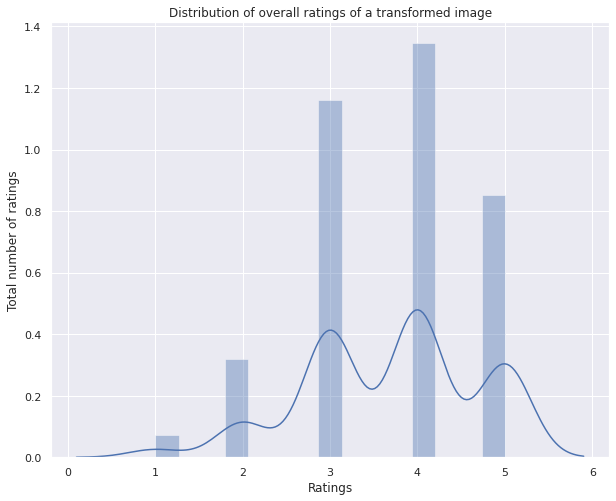

In [246]:
sns.set_theme()
fig, ax = plt.subplots(figsize = (10,8))
fig = sns.distplot(ratings_list, axlabel="Ratings")
plt.xlabel("Ratings")
plt.ylabel("Total number of ratings")
plt.title("Distribution of overall ratings of a transformed image")
plt.show(fig)
ax.figure.savefig("../evaluation/evaluation_survey_results_analysis/distribution_of_ratings.png")

### Survey_analysis 2


In [247]:
select_df = df.iloc[:, 7:12]
mapping = {
    "Option 1" : 1,
    "Option1" : 1,
    "Option 2" : 2,
    "2" : 2,
    "Option 3" : 3,
    "Option 4" : 4,
    "None of above" : 5,
}

for i in range(len(select_df.columns)):
    select_df.iloc[:, i] = select_df.iloc[:, i].map(mapping)

In [248]:
df_attributes_summary = pd.DataFrame({
      "name" : select_df.columns,
        "correct_option_position" : [2,3,3,5,3], 
        "subplots" : ["ax1", "ax2", "ax3", "ax4", "ax5"],
        "chart_name" : ['Black hair', "Blonde hair", "Brown hair", "Fake image correctly identified", 
                       "Original image correctly identified"],
        "serial_no" : [0,1,2,3,4]})

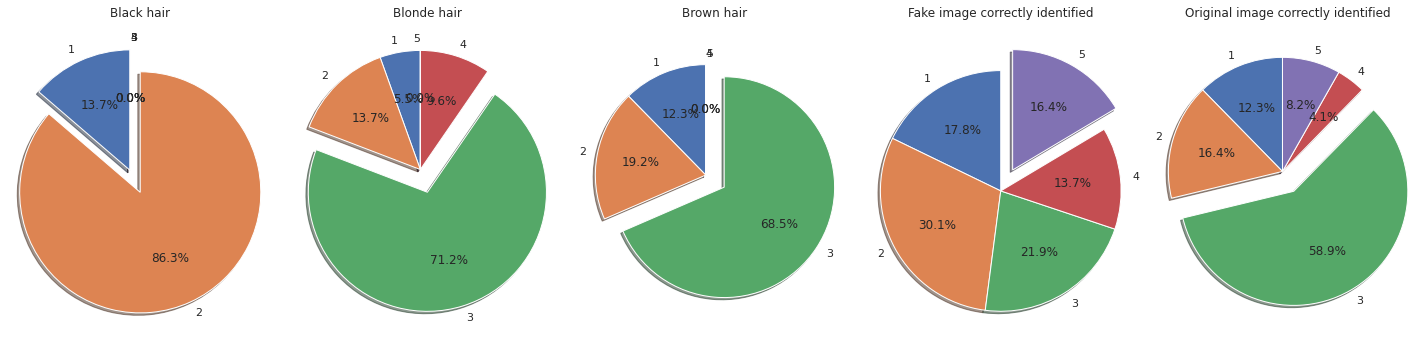

In [249]:
def plot_pie():
    respondents_percentage_correct_option = []
    
    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(ncols=5, figsize = (20,5))

    for index,row in df_attributes_summary.iterrows():
#         print(row['name'])
#         print(row['correct_option_position'])
#         print(row['subplots'])

        survey_data = select_df[row['name']]
        labels = list(survey_data.unique())
        labels.sort()
        percentage = survey_data.value_counts(normalize = True).mul(100).round(4).sort_index()
#         percentage = percentage.reindex(list(range(percentage.index.min(),5+1)),fill_value=0)
        percentage = percentage.reindex(list(range(1,5+1)),fill_value=0)
        percentage = list(percentage)

        correct_option_location = row['correct_option_position']
        labels = [1,2,3,4,5]
#         print(labels)
#         print(percentage)
        sizes = percentage
        explode = np.zeros(len(labels))  # only "explode" the 2nd slice 
        explode_location = labels.index(correct_option_location)
        explode[explode_location] = 0.2
        colors = ['Red', 'blue', 'yellow', 'purple', 'orange']
        colors[explode_location] = "green"
        
        respondents_percentage_correct_option.append(percentage[correct_option_location-1])
#         print(explode)

        eval(row['subplots']).pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
                shadow=True, startangle=90)
        eval(row['subplots']).axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        eval(row['subplots']).title.set_text(row['chart_name'])
    
    plt.tight_layout()
    plt.show()
    fig.savefig("../evaluation/evaluation_survey_results_analysis/pie_chart.png")
    return respondents_percentage_correct_option
respondents_percentage_correct_option = plot_pie()

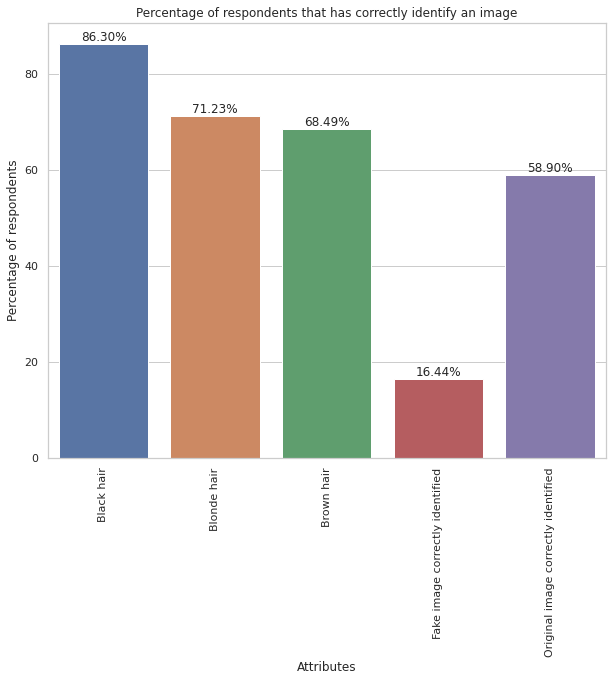

In [250]:
labels = ['Black hair', "Blonde hair", "Brown hair", "Fake image correctly identified", 
                       "Original image correctly identified"]
y = respondents_percentage_correct_option


sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize = (10,8))

fig = sns.barplot(x=labels, y=respondents_percentage_correct_option)
fig.set_xticklabels(labels, rotation=90)
plt.xlabel("Attributes")
plt.ylabel("Percentage of respondents")
plt.title("Percentage of respondents that has correctly identify an image")
for p, ratings in zip(fig.patches, y):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0.7,
            '{:1.2f}%'.format(ratings),
            ha="center") 
plt.show(fig)
fig.figure.savefig("../evaluation/evaluation_survey_results_analysis/percentage_of_respondents_accurately_identifying_image.png")

In [251]:
percentage_accurately_identifying_correct_image_df = pd.DataFrame({
    "attributes_name" : ["Black hair", "Brown hair", "Blonde hair", "Fake image correctly identified", 
                         "Original image correctly identified"],
    "respondents_percentages" : respondents_percentage_correct_option

})

In [252]:
percentage_accurately_identifying_correct_image_df

,attributes_name,respondents_percentages
0,Black hair,86.3014
1,Brown hair,71.2329
2,Blonde hair,68.4932
3,Fake image correctly identified,16.4384
4,Original image correctly identified,58.9041


### Survey analysis 3 - Visual representation of ratings for each attributes

In [253]:
rating_single_attributes = df.iloc[:, 12:]

In [254]:
def bar_chart_single_attributes(attribute_name, serial_number):
    attributes_rating = rating_single_attributes.iloc[:, serial_number].value_counts(normalize = True).mul(100).sort_index()
    attributes_rating = attributes_rating.reindex(list(range(1,5+1)),fill_value=0)

    # sns.set_theme(style="whitegrid")
    fig, ax = plt.subplots(figsize = (10,8))

    ax = sns.barplot(x = attributes_rating.index, y = attributes_rating.values)
    # ax1.axis("equal")
    for p, ratings in zip(fig.patches, attributes_rating.values):
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 0.7,
                '{:1.2f}%'.format(ratings),
                ha="center") 

    plt.xlabel("ratings")
    plt.ylabel("Percentage of respondents")
    plt.title("Percentage of respondents giving ratings for black")# + attributes_name)
    plt.show(fig)
    image_name = attribute_name +"_ratings"+".png"
    print(image_name)
    ax.figure.savefig("../evaluation/evaluation_survey_results_analysis/" + image_name)


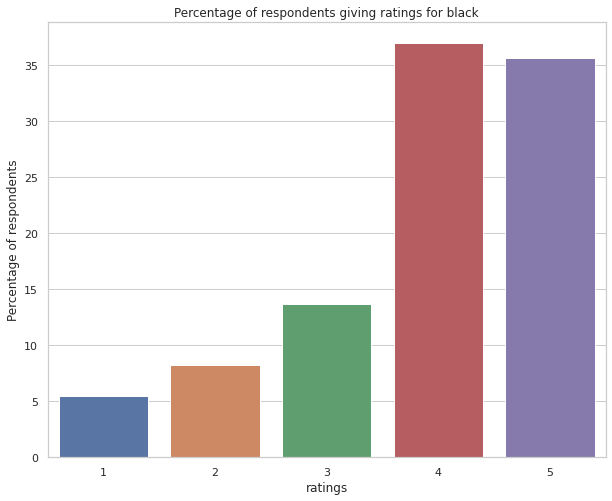

Black_hair_transformation_ratings.png


In [255]:
bar_chart_single_attributes("Black_hair_transformation", 0)    

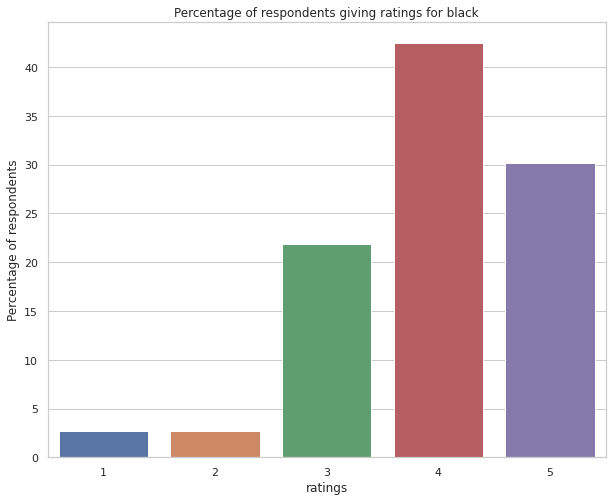

Brown_hair_transformation_ratings.png


In [256]:
bar_chart_single_attributes("Brown_hair_transformation", 1)    

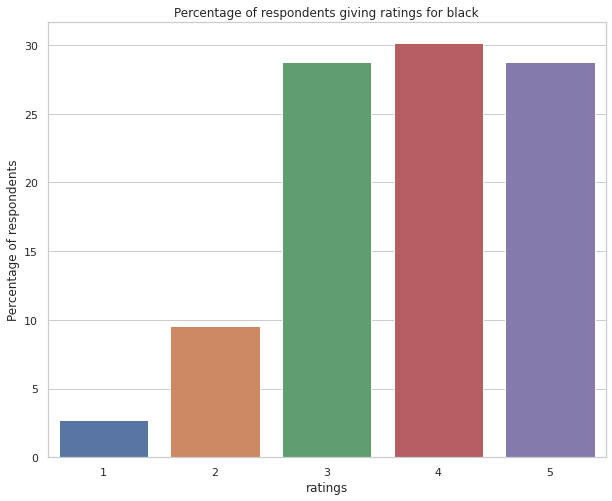

Blonde_hair_transformation_ratings.png


In [257]:
bar_chart_single_attributes("Blonde_hair_transformation", 2)    

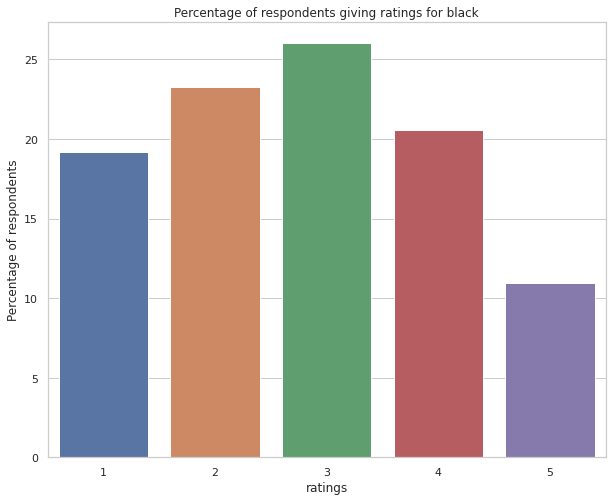

Gender_transformation_ratings.png


In [258]:
bar_chart_single_attributes("Gender_transformation", 3)    

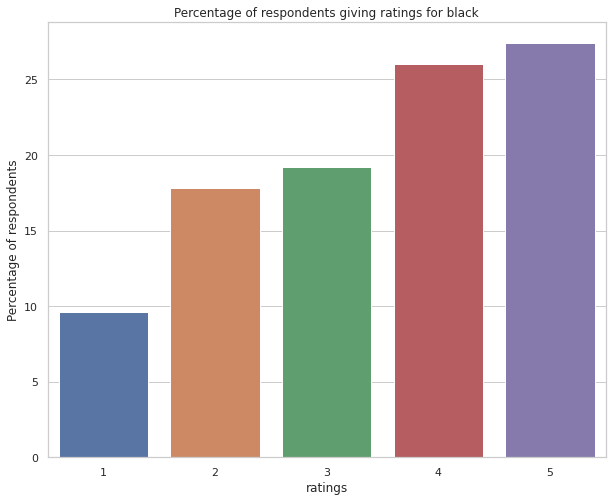

Age_transformation_ratings.png


In [259]:
bar_chart_single_attributes("Age_transformation", 4)    

### Average ratings for each attributes

In [260]:
average_ratings = []
attributes_names = ["Black hair", "Brown hair", "Blonde hair", "Gender", "Age"]
for i in range(len(rating_single_attributes.columns)):
    rating_counts = rating_single_attributes.iloc[:, i].value_counts().sort_index()
    rating_counts= rating_counts.reindex(list(range(1,5+1)),fill_value=0)
    average_ratings.append(np.sum(rating_counts.index * rating_counts.values) / np.sum(rating_counts.values))
    
average_rating_df = pd.DataFrame({
    "attributes_name" : attributes_names,
    "average_rating" : average_ratings
})

average_rating_df

,attributes_name,average_rating
0,Black hair,3.890411
1,Brown hair,3.945205
2,Blonde hair,3.726027
3,Gender,2.808219
4,Age,3.438356
